In [ ]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
# from scikeras.wrappers import KerasRegressor

In [ ]:
# Read in the data
df = pd.read_csv("/content/drive/MyDrive/ee/soilify_training_cleaned.csv")
df.head()

,B11,B12,B2,B3,B4,B5,B6,B7,B8,OC,...,evi,lai,nbr,ndmi,ndvi,ndwi,savi,skin_temperature,slope,total_precipitation
0,3210,2518,777,1122,1378,1707,2239,2478,2732,0.0003,...,0.654296,1.191717,0.040762,-0.080444,0.329440,0.417748,0.494100,299.937424,3.603270,0.001873
1,3379,2756,757,1130,1216,1830,2642,2887,3133,0.0003,...,1.008417,1.594531,0.064018,-0.037776,0.440791,0.469857,0.661110,299.937424,4.825890,0.001873
2,4205,3637,1170,1650,1992,2509,2978,3373,3465,0.0003,...,0.554343,0.976479,-0.024219,-0.096480,0.269929,0.354839,0.404856,299.937424,5.133844,0.001873
3,3613,2970,1042,1500,1766,2229,2834,3143,3090,0.0003,...,0.563692,0.986317,0.019802,-0.078025,0.272652,0.346405,0.408936,299.937424,3.606118,0.001873
4,3589,3248,979,1392,1776,2127,2545,2731,2722,0.0003,...,0.391783,0.760806,-0.088107,-0.137379,0.210316,0.323286,0.315438,299.937424,2.260778,0.001873


In [ ]:
df.drop(['B2','evi','ndwi','slope'],axis=1,inplace=True)

## standardise data

In [ ]:
#Define the dependent variable
dependent_var = "OC"

# Define the independent variables
independent_vars = list(df.drop(dependent_var, axis=1))


# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the independent variables
scaler.fit(df[independent_vars])

# Transform the independent variables using the scaler
df[independent_vars] = scaler.transform(df[independent_vars])

In [ ]:
df.shape

(1117, 21)

## Data Split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[independent_vars], df[dependent_var], test_size=0.15, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((949, 20), (168, 20), (949,), (168,))

## Linear Regression

In [ ]:
# Fit a linear regression model to the training data
lm_model = LinearRegression().fit(X_train, y_train)

# Make predictions on the testing data using the fitted model
lm_predictions = lm_model.predict(X_test)

# Calculate the root mean squared error of the predictions
lm_rmse = mean_squared_error(y_test, lm_predictions, squared=False)

# Calculate the R-squared value of the model
lm_r_squared = lm_model.score(X_test, y_test)

# Print the root mean squared error and R-squared value
print("Linear regression:")
print("RMSE:", lm_rmse)
print("R-squared:", lm_r_squared)

Linear regression:
RMSE: 0.09356997305379787
R-squared: 0.32138129982705277


## Ridge Regression

In [ ]:
# Define the hyperparameters for Ridge regression
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100]}

# Perform hyperparameter tuning for Ridge regression using cross-validation
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5).fit(X_train, y_train)

# Make predictions on the testing data using the fitted model
ridge_predictions = ridge_cv.predict(X_test)

# Calculate the root mean squared error and R-squared value of the predictions
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
ridge_r_squared = r2_score(y_test, ridge_predictions)

# Print the root mean squared error and R-squared value for Ridge regression
print("Ridge regression:")
print("Best hyperparameters:", ridge_cv.best_params_)
print("RMSE:", ridge_rmse)
print("R-squared:", ridge_r_squared)


Ridge regression:
Best hyperparameters: {'alpha': 10}
RMSE: 0.09130629731057112
R-squared: 0.35381886162146003


## Lasso Regression

In [ ]:
# Define the hyperparameters for Lasso regression
lasso_params = {"alpha": [0.01, 0.1, 1, 10, 100]}

# Perform hyperparameter tuning for Lasso regression using cross-validation
lasso_cv = GridSearchCV(Lasso(), lasso_params, cv=5).fit(X_train, y_train)

# Make predictions on the testing data using the fitted model
lasso_predictions = lasso_cv.predict(X_test)

# Calculate the root mean squared error and R-squared value of the predictions
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)
lasso_r_squared = r2_score(y_test, lasso_predictions)

# Print the root mean squared error and R-squared value for Lasso regression
print("Lasso regression:")
print("Best hyperparameters:", lasso_cv.best_params_)
print("RMSE:", lasso_rmse)
print("R-squared:", lasso_r_squared)

Lasso regression:
Best hyperparameters: {'alpha': 0.01}
RMSE: 0.09379180825072969
R-squared: 0.31815975429087984


## Elastic Net Regression

In [ ]:
# Define the hyperparameters for Elastic Net regression
elastic_net_params = {"alpha": [0.01, 0.1, 1, 10, 100], "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]}

# Perform hyperparameter tuning for Elastic Net regression using cross-validation
elastic_net_cv = GridSearchCV(ElasticNet(), elastic_net_params, cv=5).fit(X_train, y_train)

# Make predictions on the testing data using the fitted model
elastic_net_predictions = elastic_net_cv.predict(X_test)

# Calculate the root mean squared error and R-squared value of the predictions
elastic_net_rmse = mean_squared_error(y_test, elastic_net_predictions, squared=False)
elastic_net_r_squared = r2_score(y_test, elastic_net_predictions)

# Print the root mean squared error and R-squared value for Elastic Net regression
print("Elastic Net regression:")
print("Best hyperparameters:", elastic_net_cv.best_params_)
print("RMSE:", elastic_net_rmse)
print("R-squared:", elastic_net_r_squared)

Elastic Net regression:
Best hyperparameters: {'alpha': 0.01, 'l1_ratio': 0.1}
RMSE: 0.09079912180736224
R-squared: 0.3609775581587835


## Random Forest Regression

In [ ]:
# Define the hyperparameters for Random Forest regression
rf_params = {"n_estimators": [100, 200, 500], "max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]}

# Perform hyperparameter tuning for Random Forest regression using cross-validation
rf_cv = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5).fit(X_train, y_train)

# Make predictions on the testing data using the fitted model
rf_predictions = rf_cv.predict(X_test)

# Calculate the root mean squared error and R-squared value of the predictions
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r_squared = r2_score(y_test, rf_predictions)

# Print the root mean squared error and R-squared value for Random Forest regression
print("Random Forest regression:")
print("Best hyperparameters:", rf_cv.best_params_)
print("RMSE:", rf_rmse)
print("R-squared:", rf_r_squared)

Random Forest regression:
Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
RMSE: 0.0877589441000265
R-squared: 0.4030532491982829


## SVM Regression

In [ ]:
# Define the hyperparameters for Support Vector Machine regression
svm_params = {"C": [0.01, 0.1, 1, 10], "gamma": [0.01, 0.1, 1, 10], "kernel": ["linear", "rbf"]}

# Perform hyperparameter tuning for Support Vector Machine regression using cross-validation
svm_cv = GridSearchCV(SVR(), svm_params, cv=5).fit(X_train, y_train)

# Make predictions on the testing data using the fitted model
svm_predictions = svm_cv.predict(X_test)

# Calculate the root mean squared error and R-squared value of the predictions
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
svm_r_squared = r2_score(y_test, svm_predictions)

# Print the root mean squared error and R-squared value for Support Vector Machine regression
print("Support Vector Machine regression:")
print("Best hyperparameters:", svm_cv.best_params_)
print("RMSE:", svm_rmse)
print("R-squared:", svm_r_squared)


Support Vector Machine regression:
Best hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
RMSE: 0.09664311364466739
R-squared: 0.276073222162348


#GBT Regressor

In [ ]:
# Define the hyperparameters for Random Forest regression
gbr_params = {"n_estimators": [100, 150, 300], "max_depth": [None, 10, 15], "min_samples_split": [2, 5, 10]}

# Perform hyperparameter tuning for Random Forest regression using cross-validation
gbr_cv = GridSearchCV(GradientBoostingRegressor(random_state=42), gbr_params, cv=5).fit(X_train, y_train)

# Make predictions on the testing data using the fitted model
gbr_predictions = gbr_cv.predict(X_test)

# Calculate the root mean squared error and R-squared value of the predictions
gbr_rmse = mean_squared_error(y_test, gbr_predictions, squared=False)
gbr_r_squared = r2_score(y_test, gbr_predictions)

# Print the root mean squared error and R-squared value for Random Forest regression
print("Random Forest regression:")
print("Best hyperparameters:", gbr_cv.best_params_)
print("RMSE:", gbr_rmse)
print("R-squared:", gbr_r_squared)

Random Forest regression:
Best hyperparameters: {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}
RMSE: 0.0967453307161361
R-squared: 0.274541052819554


## Nueral Network

In [ ]:
# # Define the function to create the neural network model

# def create_model(neurons=1, optimizer="adam"):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=X_train.shape[1], kernel_initializer="normal", activation="relu"))
#     model.add(Dense(1, kernel_initializer="normal"))
#     model.compile(loss="mean_squared_error", optimizer=optimizer)
#     return model

# # Define the hyperparameters for the neural network model
# nn_params = {"neurons": [1, 5, 10, 15, 20], "optimizer": ["adam", "sgd", "rmsprop"]}

# # Create a KerasRegressor object
# nn_model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# # Perform hyperparameter tuning for the neural network model using cross-validation
# nn_cv = GridSearchCV(nn_model, nn_params, cv=5).fit(X_train, y_train)

# # Make predictions on the testing data using the fitted model
# nn_predictions = nn_cv.predict(X_test)

# # Calculate the root mean squared error and R-squared value of the predictions
# nn_rmse = mean_squared_error(y_test, nn_predictions, squared=False)
# nn_r_squared = r2_score(y_test, nn_predictions)

# # Print the root mean squared error and R-squared value for the neural network model
# print("Neural network regression:")
# print("RMSE:", nn_rmse)
# print("R-squared:", nn_r_squared)
# print("Best hyperparameters:", nn_cv.best_params_)

## Results

In [ ]:
results = pd.DataFrame({"Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Elastic Net Regression", "Random Forest Regression", "Support Vector Machine Regression","Gradient Boosting Regressor"],
                        "RMSE": [lm_rmse, ridge_rmse, lasso_rmse, elastic_net_rmse, rf_rmse, svm_rmse,gbr_rmse],
                        "R-squared": [lm_r_squared, ridge_r_squared, lasso_r_squared, elastic_net_r_squared, rf_r_squared, svm_r_squared,gbr_r_squared]})
results.sort_values("R-squared", ascending=False)


,Model,RMSE,R-squared
4,Random Forest Regression,0.087759,0.403053
3,Elastic Net Regression,0.090799,0.360978
1,Ridge Regression,0.091306,0.353819
0,Linear Regression,0.093570,0.321381
2,Lasso Regression,0.093792,0.318160
5,Support Vector Machine Regression,0.096643,0.276073
6,Gradient Boosting Regressor,0.096745,0.274541


### R-Squared Comparison

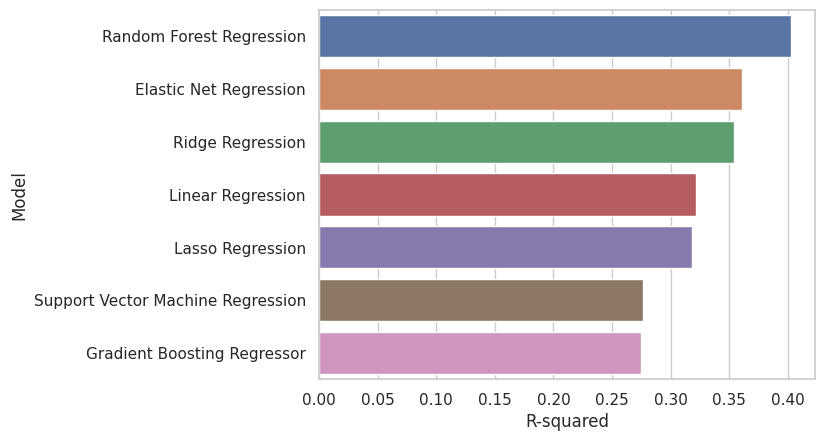

In [ ]:
# plot r2 in ascending order
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="R-squared", y="Model", data=results.sort_values("R-squared", ascending=False))
plt.show()

### Actual v/s Predicted charts

In [ ]:
import matplotlib.pyplot as plt
def plot_actual_vs_predicted(model_name, actual, predicted, ax):
    # Create a scatter plot of the actual and predicted values
    ax.scatter(actual, predicted)
    # add fitted line
    m, b = np.polyfit(actual, predicted, 1)
    ax.plot(actual, m*actual + b)
    ax.set_xlabel("Actual OC")
    ax.set_ylabel("Predicted OC")
    ax.set_title(model_name)

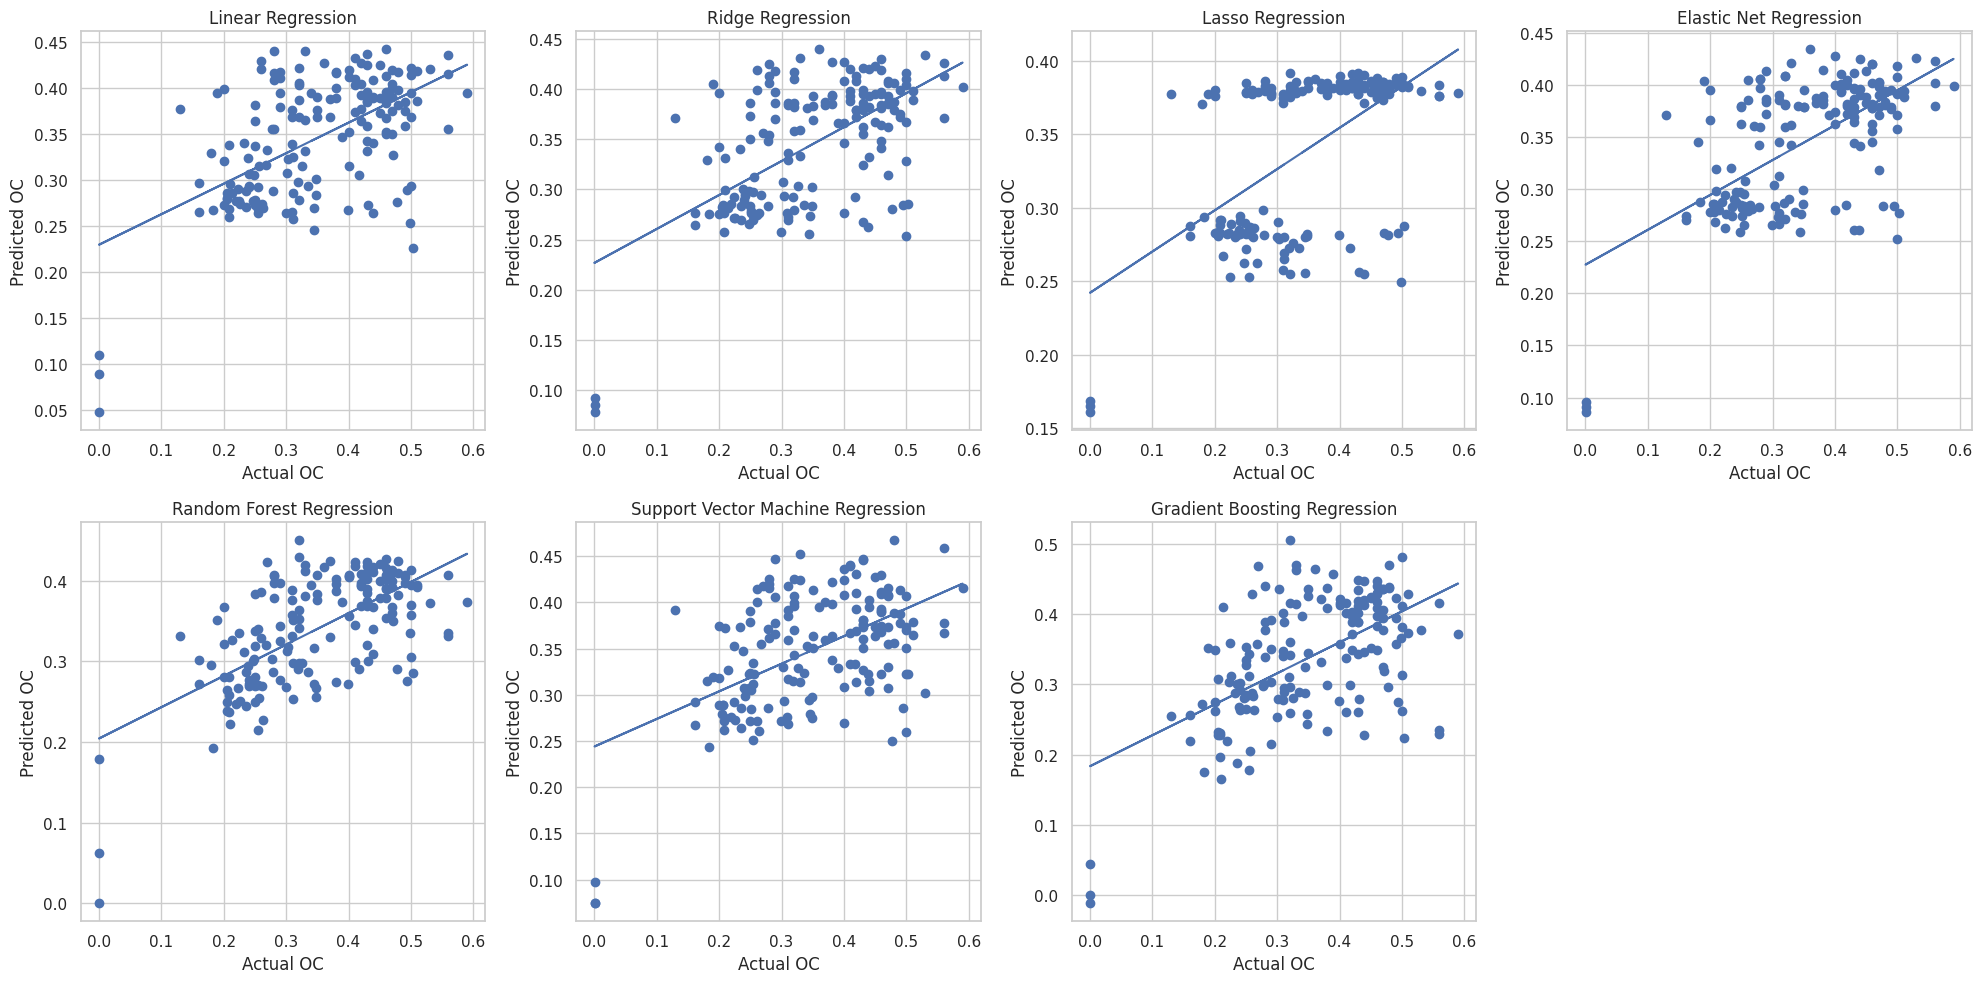

In [ ]:
# Create a 2x4 grid for plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Create the plots for the first 7 models
plot_actual_vs_predicted("Linear Regression", y_test, lm_predictions, axes[0, 0])
plot_actual_vs_predicted("Ridge Regression", y_test, ridge_predictions, axes[0, 1])
plot_actual_vs_predicted("Lasso Regression", y_test, lasso_predictions, axes[0, 2])
plot_actual_vs_predicted("Elastic Net Regression", y_test, elastic_net_predictions, axes[0, 3])
plot_actual_vs_predicted("Random Forest Regression", y_test, rf_predictions, axes[1, 0])
plot_actual_vs_predicted("Support Vector Machine Regression", y_test, svm_predictions, axes[1, 1])
plot_actual_vs_predicted("Gradient Boosting Regression", y_test, gbr_predictions, axes[1, 2])
# plot_actual_vs_predicted("Neural Network", y_test, svm_predictions, axes[1, 2])

# Hide the 8th and 9th subplots
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()
